In [8]:
from statsmodels.datasets.longley import load_pandas
import seaborn as sns
import matplotlib.pyplot as plt

# dfy : 거시경제 지표 , dfy : features
dfy = load_pandas().endog
dfx = load_pandas().exog

In [9]:
dfx

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,96.2,328975.0,2099.0,3099.0,112075.0,1951.0
5,98.1,346999.0,1932.0,3594.0,113270.0,1952.0
6,99.0,365385.0,1870.0,3547.0,115094.0,1953.0
7,100.0,363112.0,3578.0,3350.0,116219.0,1954.0
8,101.2,397469.0,2904.0,3048.0,117388.0,1955.0
9,104.6,419180.0,2822.0,2857.0,118734.0,1956.0


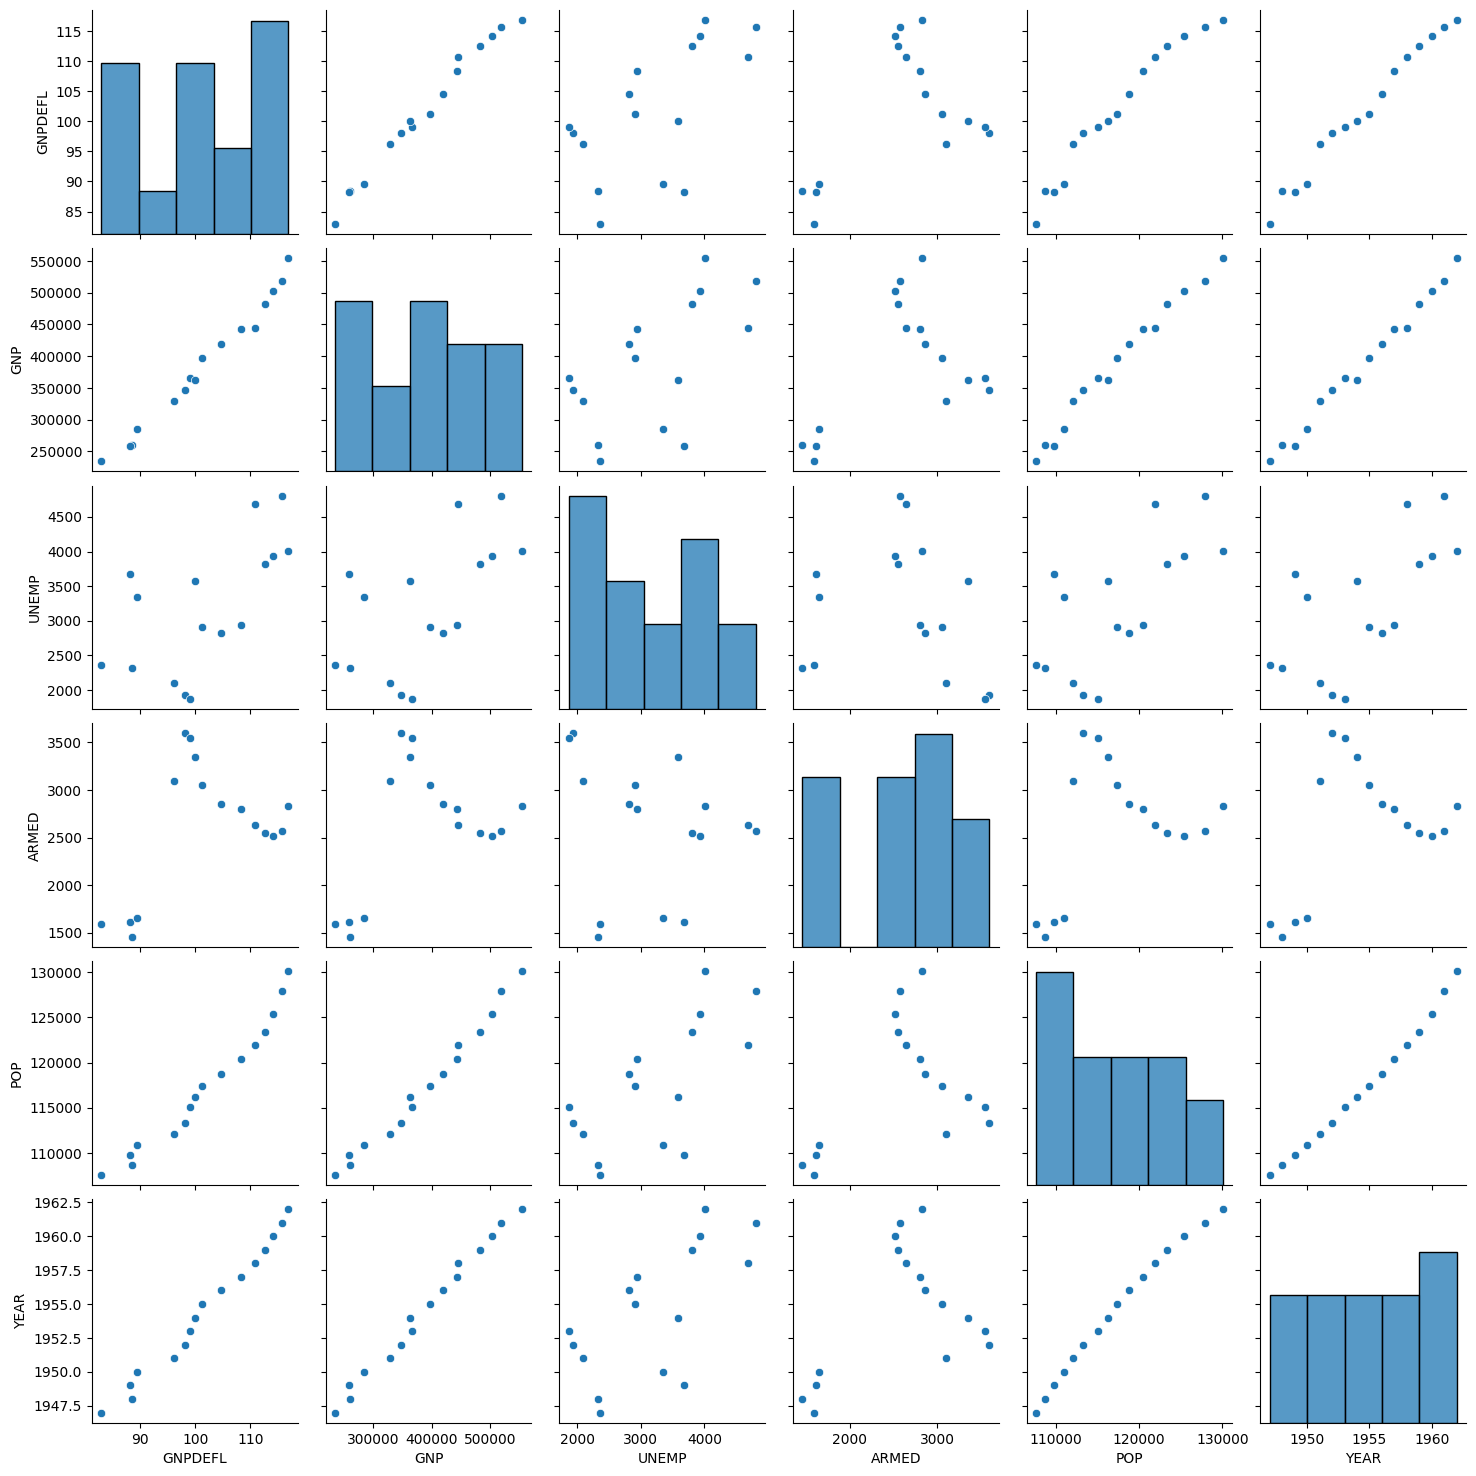

In [10]:
# seaborn pairplot 활용한 데이터 EDA
sns.pairplot(dfx)
plt.show()

In [11]:
# 상관관계 값 

dfx.corr()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
GNPDEFL,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149
GNP,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273
UNEMP,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257
ARMED,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245
POP,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953
YEAR,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000


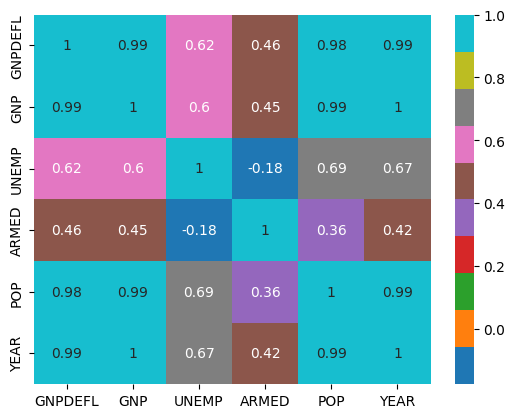

In [12]:
# heatmap 
cmap = sns.color_palette("tab10")
sns.heatmap(dfx.corr() , annot=True ,cmap=cmap )
plt.show()

In [14]:
# OLS 를 활용한 회귀결과 값 
import statsmodels.api as sm

lm = sm.OLS(dfy , dfx)
results = lm.fit()
results.summary()

C:\Users\LG\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 TOTEMP   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.052e+04
Date:                Wed, 27 Dec 2023   Prob (F-statistic):                    8.20e-22
Time:                        09:49:36   Log-Likelihood:                         -117.56
No. Observations:                  16   AIC:                                      247.1
Df Residuals:                      10   BIC:                                      251.8
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GNPDEFL      -52.9936    129.545     -0.409      0.691    -341.638     235.650
GNP            0.0711      0.030      2.356      0.040       0.004       0.138
UNEMP         -0.4235      0.418     -1.014      0.335      -1.354       0.507
ARMED         -0.5726      0.279     -2.052      0.067      -1.194       0.049
POP           -0.4142      0.321     -1.289      0.226      -1.130       0.302
YEAR          48.4179     17.689      2.737      0.021       9.003      87.832
==============================================================================
Omnibus:                        1.443   Durbin-Watson:                   1.277
Prob(Omnibus):                  0.486   Jarque-Bera (JB):                0.605
Skew:                           0.476   Prob(JB):                        0.739
Kurtosis:                       3.031   Cond. No.                     4.56e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# 다중공선성 제거 GNPDEFL , POP  ,  YEAR 를 제거하고 GNP만 남김
df_X = dfx.drop(['GNPDEFL' , 'POP' , 'YEAR'] ,axis=1)

lm = sm.OLS(dfy , df_X)
results = lm.fit()
results.summary()

C:\Users\LG\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 TOTEMP   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              228.3
Date:                Wed, 27 Dec 2023   Prob (F-statistic):                    1.72e-11
Time:                        09:59:33   Log-Likelihood:                         -168.25
No. Observations:                  16   AIC:                                      342.5
Df Residuals:                      13   BIC:                                      344.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GNP            0.0080      0.045      0.179      0.861      -0.089       0.105
UNEMP          8.8392      3.505      2.522      0.026       1.268      16.411
ARMED         12.4663      3.856      3.233      0.007       4.136      20.796
==============================================================================
Omnibus:                        1.260   Durbin-Watson:                   0.851
Prob(Omnibus):                  0.533   Jarque-Bera (JB):                0.590
Skew:                           0.469   Prob(JB):                        0.745
Kurtosis:                       2.926   Cond. No.                         698.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# VIF 이용한 다중공선성 판단.

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
%matplotlib inline

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dfx.values, i) for i in range(dfx.shape[1])]
vif["features"] = dfx.columns
vif

,VIF Factor,features
0,12425.514335,GNPDEFL
1,10290.435437,GNP
2,136.224354,UNEMP
3,39.983386,ARMED
4,101193.161993,POP
5,84709.950443,YEAR


In [20]:
df = pd.read_csv('./datasets/house_prices.csv')
df.head()


,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [23]:
df_house_x = df.drop(['price', 'neighborhood'] , axis=1)

In [30]:
from patsy import dmatrices

dfy, dfX = dmatrices('price ~ area + bedrooms + bathrooms', df, return_type = 'dataframe')
# X
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns 
vif

,VIF Factor,features
0,7.327102,Intercept
1,5.458190,area
2,20.854484,bedrooms
3,19.006851,bathrooms


In [31]:
lm = sm.OLS(dfy , dfX)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Wed, 27 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:28:20   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
y, X = dmatrices('price ~ area + bathrooms', df, return_type = 'dataframe')
# X
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Factor,features
0,4.438137,Intercept
1,4.871816,area
2,4.871816,bathrooms


In [33]:
lm = sm.OLS(y , X)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     6346.
Date:                Wed, 27 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:31:11   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6025   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8215.9441   8063.295      1.019      0.308   -7590.999     2.4e+04
area         345.2352      6.827     50.566      0.000     331.851     358.619
bathrooms   3834.7685   7223.513      0.531      0.596   -1.03e+04     1.8e+04
==============================================================================
Omnibus:                      367.677   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.604
Skew:                           0.536   Prob(JB):                     7.37e-77
Kurtosis:                       2.504   Cond. No.                     5.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""